# Chiastic Structures in _The Moonstone_

## Songyue Xiao


In [2]:
from nltk import word_tokenize
from nltk.text import Text
from textblob import TextBlob
import pandas as pd
%matplotlib inline

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

When finishing reading the epilogue of _The Moonstone_, I felt a sense of completeness that was resulted not only from the fact that I finally finished reading this book but also from _The Moonstone_'s special structure. In my opinion, two elements that obviously gave me the sense of completeness were the moonstone's hometown, India, and Betteredge's favorite book, Robinson Crusoe, because they appeared both at the beginning and at the end of the novel. By close reading, I found that Rachel's relation with Franklin was also symmetrical. This kind of amazing structure that gave me the sense of completeness is known as chiastic structure. To argue my point that there are chiastic structures in _The Moonstone_ including the context, India, Robinson Crusoe, and Rachel's relation with Franklin, I will introduce the definition of chiastic structure, prove my point by close reading, and track chiastic structures in _The Moonstone_ using computational analysis. Moreover, I will analyze the function of chiastic structures in _The Moonstone_.

## The Definition of Chiastic Structure

Before introducing chiastic structure, I want to introduce chiasmus, a kind of unique rhetorical device, first. Chiasmus is a reversal of grammatical structures in successive phrases or clauses – but no repetition of words (Corbett and Connors). By using this kind of rhetorical device, authors can let readers realize what they want to emphasize by their words. Applying the definition of chiasmus to the novel's structure, we have the definition of chiastic structure that is also called circular structure or symmetric structure.

## Close Reading

### The Moonstone in India

"One of the wildest of these stories related to a Yellow Diamond–a famous gem in the native annals of India."(Collins 47) This sentence that is in the prologue of the novel tells readers that this novel started from India, the hometown of the moonstone. "How it has found its way back to its wild native land–by what accident, or by what crime, the Indians regained possession of their sacred gem, may be in your knowledge, but is not in mine."(Collins 20652) This sentence is in the epilogue of the novel, which shows that the whole story ended with returning the moonstone to the place it belonged to, India, forming exactly a chiastic structure.

### Robinson Crusoe

"In the first part of ROBINSON CRUSOE, at page one hundred and twenty-nine, you will find it thus written:'Now I saw, though too late, the Folly of beginning a Work before we count the Cost, and before we judge rightly of our own Strength to go through with it.'"(Collins 258) This sentence is in the first chapter of Betteredge's first narrative. Betteredge's narrative began with one of his understandings of Robinson Crusoe. "But when I write of ROBINSON CRUSOE, by the Lord it’s serious–and I request you to take it accordingly!"(Collins 20414) This sentence shows up in the last chapter of Betteredge's last narrative. Betteredge's narrative also ended with his favorite book, Robinson Crusoe, which creats a chiastic structure.

### Rachel's Relation with Franklin

In the whole novel, Rachel's relation with Franklin is not consistent. At first, they got along with each quite well, which we could know from the text that "Penelope mentioned that she had never known Miss Rachel so particular about the dressing of her hair, and had never seen her look so bright and pretty as she did when she went down to meet Mr. Franklin in the drawing-room."(Collins 1954) After the accident of the moonstone, Rachel became disappointed and angry with Franklin because she thought Franklin stole her moonstone, which we could know from words in Franklin's narrative that "The inference was too plain to be resisted. Rachel declined to see me."(Collins 12672) Finally, they became together again after Rachel knew the truth. Betteredge said,"the fact to which I allude is–the marriage of Miss Rachel and Mr. Franklin Blake. This interesting event took place at our house in Yorkshire, on Tuesday, October ninth, eighteen hundred and forty-nine."(Collins 20345), which shows that they made up again. Rachel's relation with Franklin started from loving each other then they broke up. Later, they made up again, forming a chiastic structure.

## Tracking Chiastic Structures in _The Moonstone_ by Computational Analysis

In [3]:
# Creat the corpus
moonstoneStr = open('moonstone.md').read()
# Make all tokens lower case
moonstoneTokens = word_tokenize(moonstoneStr.lower())
moonstoneText = Text(moonstoneTokens)

### The Moonstone in India

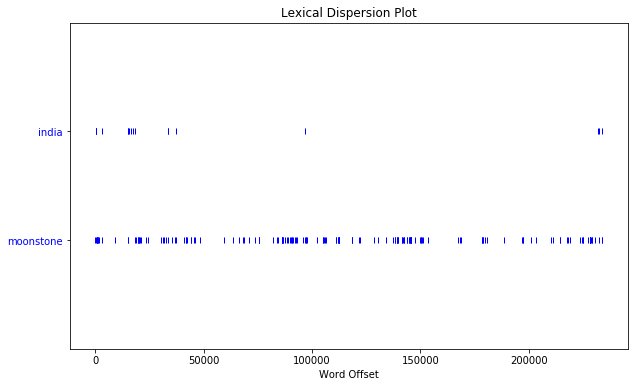

In [4]:
moonstoneText.dispersion_plot(['india', 'moonstone'])

Figure 1

From figure 1, the dispersion plot, it is clear that the token, 'moonstone', and the token, 'india', do appear both at the beginning of the novel and at the end of the novel. To show it more apparently, I want to find the indexes of their first appearance and last appearance.

In [5]:
# Reverse the list of moonstone tokens
# to show the token's first appearance from the begining and its last appearance form the end
moonstoneTokensR = list(reversed(moonstoneTokens))

In [6]:
india = []
india.append(moonstoneTokens.index('india'))
india.append(moonstoneTokensR.index('india'))

moonstone = []
moonstone.append(moonstoneTokens.index('moonstone'))
moonstone.append(moonstoneTokensR.index('moonstone'))

In [7]:
india

[283, 404]

Since there are over twenty thousand tokens in the list of the moonstone tokens, this result is quite symmetrical.

In [8]:
moonstone

[9, 5]

This result is even more symmetrical.

### Robinson Crusoe

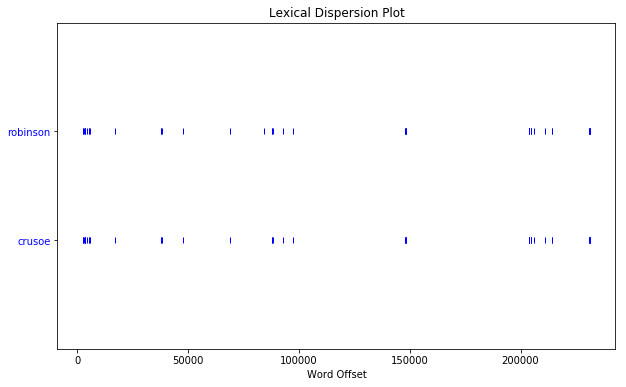

In [9]:
moonstoneText.dispersion_plot(['robinson', 'crusoe'])

Figure 2

Figure 2 shows that 'Robinson Crusoe' appears at the beginning of the novel and shows up again at the end of the novel.

In [10]:
robinson = []
robinson.append(moonstoneTokens.index('robinson'))
robinson.append(moonstoneTokensR.index('robinson'))

crusoe = []
crusoe.append(moonstoneTokens.index('crusoe'))
crusoe.append(moonstoneTokensR.index('crusoe'))

In [11]:
robinson

[2569, 2570]

In [12]:
crusoe

[2570, 2569]

I was surprised by my finding that the indexes of their first and last appearance are almost the same, which meets my argument to a great extent.

### Rachel's Relation with Franklin

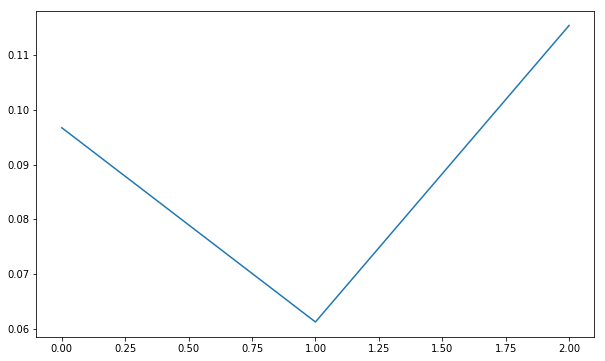

In [13]:
moonstoneParas = moonstoneStr.split('\n\n')
# Filter out paragraphs containing the token, 'Rachel'
rachelList1 = [para for para in moonstoneParas if 'Rachel' in para]
# Connect every hundred paragraphs
rachelList2 = [' '.join(rachelList1[i*100:(i+1)*100]) for i in range(int(len(rachelList1)/100))]
rachelBlob = [TextBlob(para) for para in rachelList2]
rachelSentiments = [blob.sentiment.polarity for blob in rachelBlob]
pd.Series(rachelSentiments).plot()

Figure 3

I want to mention why I did not include paragraphs containing 'Miss Verinder' as well. In Rachel's relation with Franklin, Rachel will rarely be called Miss Verinder. Only people such as their maids or Betteredge will call her Miss Verinder. In this case, I think that Rachel is more representative. In addition, I want to explain why I connected every hundred paragraphs. There are over three hundred paragraphs that contain the token, 'Rachel', which makes it difficult for me to find the general shape and my hypothesis just includes three phases. As Rachel's mood must change following the change of her relation with Franklin, Figure 3 shows that Rachel's sentiment is quite high at first then goes down then goes up again, which corresponds with my hypothesis.

## The Function of Chiastic Structures in _The Moonstone_

### Criticize Britain's Aggresion Against India

As we know, Collins strongly disapproves of British's aggression to India. The behavior that Colonel Herncastle plundered the moonstone is somewhat like what Britain did to India. Tragic stories that happened after they gained the possession of the moonstone may convey an information to readers that aggression will never have a good result. At the end, the moonstone was returned to India, which can be treated as an analogy to the fact that Britain stopped aggression against India. Making the moonstone a chiastic structure, Collins successfully let readers know his emphasis on his disfavor with Britain's aggression against India. 

### The Power of Faith

As a very important role in the novel, Betteredge's role starts with _Robinson Crusoe_ and ends with it as well. He takes the novel, _Robinson Crusoe_, as the treatment to his bad mood and often uses words in _Robinson Crusoe_ to inspire himself, which let me feel how much one's faith can influence him. By creating a chiastic structure here, Collins might want to emphasize the power of people's faith.

### The Courage to Pursue Love

Compared with other female characters who are very traditional and afraid to socialize with others alone such as her mother who did not want to communicate with Sergent Cuff alone, Rachel is a quite special girl. She is not willing to live a life like most women at that time but has her own ideas. As long as she fell in love with someone, she would stick to her ideas, which could be proved by the fact that she did not marry Mr. Godfrey very casually but waited for Franklin even if they broke up for a while. The chiastic structure of Rachel's relation with Franklin emphasizes that women should have the courage to pursue what they want and the good result of Rachel and Franklin is endowed with Collins sincere wish to women like Rachel.

## Conclusion

Computational anylysis is really an efficient tool that could visualize special patterns of literature. By this kind of visualisation, readers are allowed to figure out the reasons why the novel gives them unique feelings. In the novel, _The Moonstone_, the author, Collins, uses a literary technique that is known as chiastic structure. By computational analysis above, it is clear that there are three elements that form chiastic structures including the moonstone's hometown, India, Robinson Crusoe, and Rachel's relation with Franklin.

As Lanham, Richard A, a scholar of the history of rhetoric, said, "by keeping the phrase but inverting its meaning, we use our opponent’s own power to overcome him, just as a judo expert does."(Lanham), even if Collins did not write what he wanted to emphasize directly, readers can realize his emphasis from the chiastic structures in _The Moonstone_.

## Works Cited

Collins, Wilkie. _The Moonstone_. n.d.

Corbett, Edward P. J. and Robert J. Connors. _Style and Statement_. New York: Oxford University Press, 1999.

Lanham, Richard A. _Analyzing Prose_, 2nd ed. London: Continuum, 2003.